In [1]:
# Some imports and defaults setup to begin with

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.signal as si
import time
import sys
import scipy.ndimage as ndi
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  

plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.cmap'] = 'gray'

default_prec = 3
np.set_printoptions(precision=default_prec)

%load_ext autoreload
%autoreload 2
%matplotlib inline

# homemade
import bezier_optim as bo 
import helpers as h

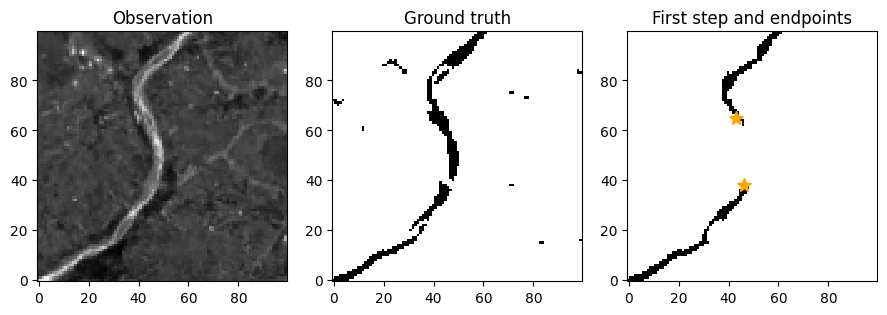

In [2]:
num = 1 # select between 1 - 20 for different test cases.

Y, Y_orig,P_start,P_end,binary = h.get_image_endpoints(num)
X_GT = plt.imread(f"./ground truths/gt{num}.png")[::-1,:,0]==0

plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.imshow(Y_orig)
plt.title('Observation')

plt.subplot(1,3,2)
plt.imshow(X_GT)
plt.title('Ground truth')

plt.subplot(1,3,3)
plt.imshow(binary)
plt.title('First step and endpoints')
plt.plot(P_start[1],P_start[0],'*',c='orange',ms=10)
plt.plot(P_end[1],P_end[0],'*',c='orange',ms=10)
plt.tight_layout()

In [3]:
# Number of points in the Bézier curve.
n_pt_total = 15
curve_type = 'bezier'
solver = 'mix' # Or "metropolis' or 'bfgs'. 'mix' stands for the combination of both.
np.random.seed(0)

# This might take some time, depending on n_pt.
P, Q = Y.shape
dy,dx = np.mgrid[0:P,0:Q]
dx_flat = dx.flatten().reshape(-1,1)
dy_flat = dy.flatten().reshape(-1,1)


list_of_est, theta_est, X_est = bo.find_curve_greedy(Y,P_start,P_end,n_pt_total,
                                                              dx_flat,dy_flat,P,Q,curve_type,
                                                              solver,verbose=False,n_iter = 1000)

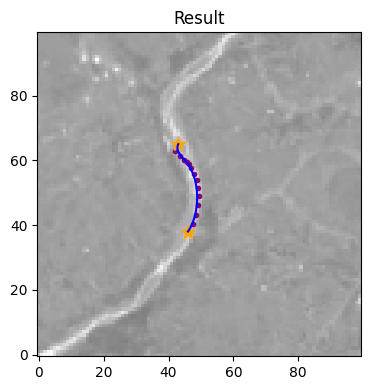

In [5]:
dt = np.linspace(0,1,100).reshape(-1,1)

plt.figure(figsize=(4,4))
plt.imshow(Y_orig,alpha=0.5)
plt.title('Result')

if curve_type=='bezier':
    bezier = bo.get_bezier_curve(theta_est,dt)
else:
    bezier = bo.get_segment_curve(theta_est,dt)

n_pt = int((theta_est.size - 2)/2)
points = np.reshape(theta_est[2:], (n_pt, 2))
for i in range(1,n_pt-1):
        plt.plot(points[i,1],points[i,0],'.',c='Purple')
plt.plot(P_start[1],P_start[0],'*',c='orange',ms=10)
plt.plot(P_end[1],P_end[0],'*',c='orange',ms=10)

plt.plot(bezier[:,1],bezier[:,0],'-b')
plt.tight_layout()
plt.show()